# A Lesson on Feature Engineering

Hello! Welcome to a guest lesson from Spencer. Spencer is a software engineer who works with data and machine learning models at [Picnic Health](https://picnichealth.com/).

Today's lesson will be on feature engineering. You'll spend the class diving into some example data, developing features and building a model.

You'll work individually but will check in with other's periodically to compare ideas.

## Setup

You're already running this notebook in Colab so good job! Now run the below cells to import packages and load data.

## The Data

I've pulled data from the Airbnb monitoring project. [You can find the raw data here](http://insideairbnb.com/get-the-data.html) and [an interesting data visualization here](http://insideairbnb.com/new-york-city/).

## The Goal

The plan today is to build a classification model that predicts whether given a bunch of host's listing whether that host will receive a high number of reviews.

## The Plan

- 30 minutes on data exploration
- 10 minutes of discussion
- 45 minutes on feature engineering
- 10 minutes of discussion
- 15 minutes on modeling
- 10 minutes of discussion
- 30 minutes to iterate on your work

Total: 2.5 hours

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
total_ratings_per_host = pd.read_csv('https://raw.githubusercontent.com/sbarton272/usf_econ_622_feature_engineering/master/derived_data/total_ratings_per_host.csv',
                                     index_col='host_id')

In [20]:
listings = pd.read_csv('https://raw.githubusercontent.com/sbarton272/usf_econ_622_feature_engineering/master/derived_data/listings.csv')

---

## Data Exploration

You're now going to take some time to explore the data.

### The Plan

- Spend 10 minutes starting to look at the data
- Spend 10 minutes to check-in with your classmates to hear about what they have discovered
- Spend 10 minutes looking at the data a bit more and thinking about issues you'll face

Remember you're trying to predict is a host has a `high_number_of_reviews` based on the host's listings.

Consider these questions
- Which columns do you think will best predict `high_number_of_reviews`?
- Are there columns with data that needs to be converted to a better format?
- How many listings are there per host?
- What should you do about null values?

### The Datatables

You have two csvs imported into pandas dataframes at this point.

**`total_ratings_per_host`**

This is a table indexed with `host_id` and containing two columns:

- `reviews_per_month` contains the total average number of reviews the host gets per month across all of their listings.
- `high_number_of_reviews` contains a boolean (0 or 1) indicating if the total average number is above the median for all hosts.

**`listings`**

This table contains a bunch of data. The `host_id` column can be used to join between this table and the `total_ratings_per_host` table.

This table has a bunch of interesting challenges. Some starter code is provided to get you going.

In [6]:
total_ratings_per_host.shape

(37758, 3)

In [7]:
total_ratings_per_host.head()

,host_id,reviews_per_month,high_number_of_reviews
0,2259,0.01,0
1,2438,0.04,0
2,2571,0.36,1
3,2782,0.55,1
4,2787,2.79,1


In [8]:
listings.shape

(50378, 71)

In [9]:
listings.head()

,Unnamed: 0,id,name,summary,description,experiences_offered,host_id,host_name,host_since,host_location,...,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,0,2060,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...",none,2259,Jenny,2008-08-18,US,...,f,f,f,flexible,f,f,1,0,1,0
1,1,2595,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","Beautiful, spacious skylit studio in the heart...",none,2845,Jennifer,2008-09-09,"New York, New York, United States",...,f,f,f,strict_14_with_grace_period,t,t,2,2,0,0
2,2,3831,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",...,f,f,f,moderate,f,f,1,1,0,0
3,3,5099,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,My large 1 bedroom apartment has a true New Yo...,none,7322,Chris,2009-02-02,"New York, New York, United States",...,f,f,f,moderate,t,t,1,1,0,0
4,4,5121,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,7356,Garon,2009-02-03,"New York, New York, United States",...,f,f,f,strict_14_with_grace_period,f,f,1,0,1,0


It's your turn to explore the data! If you're stumped on what tools to use check out these pandas methods:

- [histogram code (hist)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)
- [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
- [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)
- Some data is in strings. How do you deal with those? [Maybe try some string methods.](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#splitting-and-replacing-strings)

In [10]:
# Write some code and look at the data!

---

## Feature Engineering

You've taken a look at the data. Now we've got to focus on getting data ready for modeling.

### The Plan

- Spend 10 minutes thinking about some feature ideas
- Spend 10 minutes to check-in with your classmates to hear about what they have discovered
- Spend 25 minutes working on building a feature vector

Remember you're trying to predict is a host has a `high_number_of_reviews` based on the host's listings.

Consider these questions
- How are you going to aggregate listings?
- What should you do about null values?
- Which columns do you think will best predict `high_number_of_reviews`?
- How are you going to analyze your features?

In [22]:
# Here is some starter code to develop features

features = pd.DataFrame()

# Attach the target value for ease of analysis
features['target'] = total_ratings_per_host['high_number_of_reviews']

# Here is an example feature
features['count_of_listings'] = listings.groupby('host_id')['id'].count()

print(features.shape)
features.head()

(37758, 2)


,target,count_of_listings
host_id,,
2259,0,1
2438,0,1
2571,1,1
2782,1,2
2787,1,6


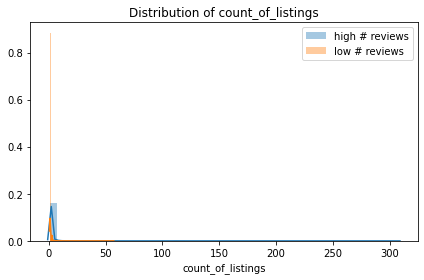

In [26]:
# Here is some code to help you analyze your features

def plot_feature_distributions(features, feature_col, target_col='target'):
    is_high_number_of_reviews = features[target_col] == 1
    
    fig, ax = plt.subplots()
    sns.distplot(features[is_high_number_of_reviews][feature_col], ax=ax, label='high # reviews')
    sns.distplot(features[~is_high_number_of_reviews][feature_col], ax=ax, label='low # reviews')
    ax.legend()
    ax.set_title(f'Distribution of {feature_col}')
    fig.tight_layout()
    
plot_feature_distributions(features, 'count_of_listings')

It is your turn to write some more features!

Take a look at some of these useful pandas methods
- [aggregation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
- [groupby for aggregation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
- [string data extraction](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#extracting-substrings)
- [histogram code (hist)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)
- [correlation calculation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

In [ ]:
# Write some more features!

---

## Modeling and Model Evaluation

Now you've written some features. Most of the modeling code has been written but feel free to modify things!

### The Plan

- Spend 5 minutes to run the following code and see what happens
- Spend 10 minutes to check-in with your classmates to hear about what they have discovered

Consider these questions
- Is the model fitting well?
- Are there any other types of models you'd like to try?

In [28]:
# TODO
from hyperopt import hp
space = hp.choice(
    'classifier_type',
    [
        {
            'type': 'naive_bayes',
        },
        {
            'type': 'svm',
            'C': hp.lognormal('svm_C', 0, 1),
            'kernel': hp.choice('svm_kernel', [
                {'ktype': 'linear'},
                {'ktype': 'RBF', 'width': hp.lognormal('svm_rbf_width', 0, 1)},
                ]),
        },
        {
            'type': 'dtree',
            'criterion': hp.choice('dtree_criterion', ['gini', 'entropy']),
            'max_depth': hp.choice('dtree_max_depth',
                [None, hp.qlognormal('dtree_max_depth_int', 3, 1, 1)]),
            'min_samples_split': hp.qlognormal('dtree_min_samples_split', 2, 1, 1),
        },
    ],
)